## House prices prediction

In [1]:
import pandas as pd
from sklearn import *

data = pd.read_csv('C:\\DataScience\\Kaggle\\houseprices\\Data\\train-cleaned.csv')
pd.options.display.max_columns = 100
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No fireplace,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No pool,No fence,No Misc Feature,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No pool,No fence,No Misc Feature,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No pool,No fence,No Misc Feature,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No pool,No fence,No Misc Feature,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No pool,No fence,No Misc Feature,0,12,2008,WD,Normal,250000


In [2]:
y = data['SalePrice']
data.drop('SalePrice', axis=1, inplace=True)

In [3]:
test = pd.read_csv("C:\\DataScience\\Kaggle\\houseprices\\Data\\test-cleaned.csv")
test.shape

(1459, 80)

In [4]:
data.shape

(1460, 80)

In [5]:
full_data = pd.concat([data, test], axis=0)
full_data.shape

(2919, 80)

In [6]:
full_data_dummies = pd.get_dummies(full_data)
full_data_dummies.shape

(2919, 303)

In [7]:
X = full_data_dummies.iloc[range(data.shape[0]),:]
X.shape

(1460, 303)

In [8]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,GarageType_Detchd,GarageType_No garage,GarageFinish_Fin,GarageFinish_No garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_No garage,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_No garage,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_No pool,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No fence,MiscFeature_Gar2,MiscFeature_No Misc Feature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65,8450,7,5,2003,2003,196,706.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80,9600,6,8,1976,1976,0,978.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68,11250,7,5,2001,2002,162,486.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60,9550,7,5,1915,1970,0,216.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84,14260,8,5,2000,2000,350,655.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [9]:
test_X = full_data_dummies.iloc[range(data.shape[0], full_data.shape[0]),:]
test_X.shape

(1459, 303)

## Polynomial regression | cross validation | validation curves

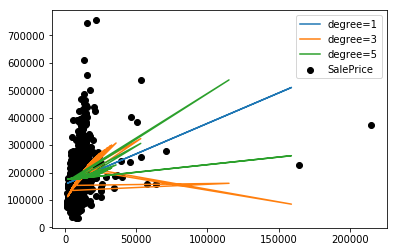

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

def PolynomialRegression(degree=2, **kwargs):
    return(make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs)))

poly_feature_X = X['LotArea']

X_train, X_val, y_train, y_val = train_test_split(poly_feature_X, y, random_state=123, test_size=0.2)

import numpy as np
X_train_array = np.array(X_train)
X_train_array = X_train_array.reshape(-1, 1)
X_val_array = np.array(X_val)
X_val_array = X_val_array.reshape(-1, 1)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.scatter(X_train.ravel(), y_train, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    preds = PolynomialRegression(degree).fit(X_train_array, y_train).predict(X_val_array)
    plt.plot(X_val.ravel(), preds, label=f'degree={degree}')
plt.legend(loc='best')

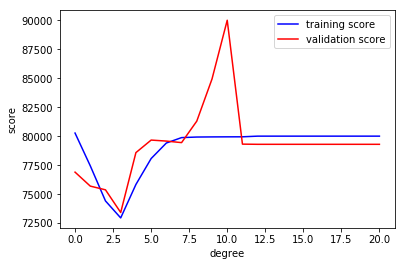

In [47]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error, make_scorer

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X_train_array, 
                                          y_train, 
                                          'polynomialfeatures__degree', 
                                          degree, 
                                          cv=5,
                                          scoring = make_scorer(mean_squared_error))
plt.plot(degree, np.median(np.sqrt(train_score), 1), color='blue', label='training score')
plt.plot(degree, np.median(np.sqrt(val_score), 1), color='red', label='validation score')
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc='best')

* Best RMSE for polynomial regression is at 3 degrees

## Using validation curve for random forest

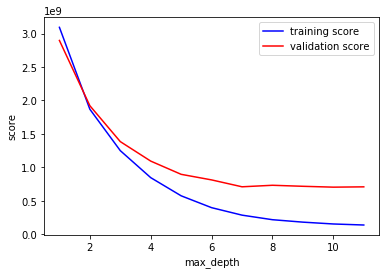

In [22]:
from sklearn.ensemble import RandomForestRegressor

depth = np.arange(1, 12)
mse_scorer = make_scorer(mean_squared_error)

train_score, val_score = validation_curve(RandomForestRegressor(n_estimators=100), X, y, 'max_depth', depth, cv=10, scoring=mse_scorer)

plt.plot(depth, np.median(train_score, 1), color='blue', label='training score')
plt.plot(depth, np.median(val_score, 1), color='red', label='validation score')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(loc='best')

* So for our model a depth of 7 would be ideal because the validation score stabilizes after 7.
* **So this is how using validation_curve() we can get an idea of the effect of single hyperparameter values on the validation score**

## Learning curve

* Used to compare varying proportion of training sets and the resulting train and validation metrics for a model

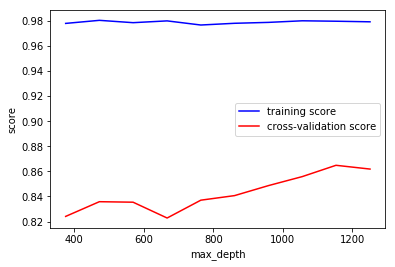

In [32]:
from sklearn.model_selection import learning_curve

# take range 0.3 to 1 and split 25 times
range_of_train_sizes = np.linspace(0.3, 1, 10)

N, train_lc, val_lc = learning_curve(RandomForestRegressor(n_estimators=100), X, y, cv=7, train_sizes=range_of_train_sizes)

plt.plot(N, np.median(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.median(val_lc, 1), color='red', label='cross-validation score')
plt.xlabel('training_samples')
plt.ylabel('score')
plt.legend(loc='best')

* Changing max_depth to 7
* I think we are overfitting the training data here and our model is not able to generalize well on unseen data.

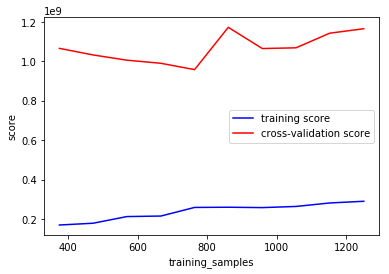

In [37]:
N, train_lc, val_lc = learning_curve(RandomForestRegressor(n_estimators=100, max_depth=7), X, y, cv=7, train_sizes=range_of_train_sizes,
                                    scoring=mse_scorer)

plt.plot(N, np.median(train_lc, 1), color='blue', label='training score')
plt.plot(N, np.median(val_lc, 1), color='red', label='cross-validation score')
plt.xlabel('training_samples')
plt.ylabel('score')
plt.legend(loc='best')

* This is a datsaet where we need more data for these curves to come closer
* We obviously don't have that option to expand our training data so we will move forward to the next section

## GridsearchCV

* Visualizing train-validation scores for 1 parameter is limiting. We usually have multiple hyperparameters for our models.
* Plots in this case become complex as there are more than 2 dimensions.
* So in such cases we usually only want to get the parameter values that performed the best on a particular dataset.

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

rf_param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [50, 100, 150],
              'max_features': [0.3, 0.5, 0.7]
             }

rf_grid = GridSearchCV(RandomForestRegressor(n_estimators=100), rf_param_grid, cv=7)
rf_grid.fit(X, y)

# training start time - 17:52
rf_grid.best_params_

NameError: name 'grid' is not defined

* The best parameters

In [16]:
rf_grid.best_params_

{'max_depth': 7, 'max_features': 0.3, 'min_samples_split': 50}

In [18]:
X_train.shape

(1314,)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=123, test_size=0.1)

model = RandomForestRegressor(n_estimators=100, max_depth=7, max_features=0.3, min_samples_split=50)
model.fit(X_train, y_train)

y_preds = model.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_preds))

33203.07155805188

In [38]:
sklearn.metrics.r2_score(y_val, y_preds)

0.8371643207964617

* Now that we have got our best model using 100 trees.
* Lets see what effect will we have if we increase the number of trees
* We use validation curve for that since we are again going to use values of 1 hyperparameters

In [40]:
train_scores, cv_scores = sklearn.model_selection.validation_curve(RandomForestRegressor(max_depth=7, max_features=0.3, min_samples_split=50),\
                                                                  X,
                                                                  y,
                                                                  'n_estimators',
                                                                  [200, 400, 600, 800],
                                                                  cv = 7,
                                                                  scoring = make_scorer(mean_squared_error))

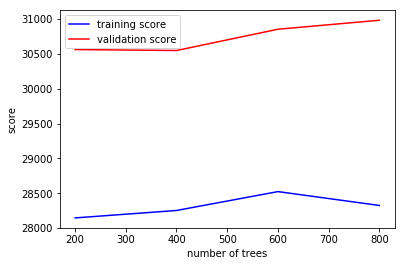

In [42]:
plt.plot([200, 400, 600, 800], np.median(np.sqrt(train_scores), 1), color='blue', label='training score')
plt.plot([200, 400, 600, 800], np.median(np.sqrt(cv_scores), 1), color='red', label='validation score')
plt.xlabel('number of trees')
plt.ylabel('score')
plt.legend(loc='best')

* We can see the model fitted with 200 trees is no better than model we fit at 800 trees.
* Albeit the 200 trees cv RMSE is better than the validation RMSE which we got for 100 trees above. Lets use the same validation data above for better comparison

In [43]:
model = RandomForestRegressor(n_estimators=200, max_depth=7, max_features=0.3, min_samples_split=50)
model.fit(X_train, y_train)

y_preds = model.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_preds))

33527.54423514149